# Data-Driven Insights on Dengue Patterns in PH

from 2008 to 2016

This data analysis aims to examine the trend of dengue cases in the Philippines from 2008 to 2016. Specifically, it seeks to identify overall yearly trends, detect seasonal patterns based on monthly case distribution, determine which regions are more prone to increases in dengue incidence, and highlight periods when cases spiked or dropped significantly.

Data is obtained from Kaggle: https://www.kaggle.com/datasets/grosvenpaul/dengue-cases-in-the-philippines

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

sns.set(style="whitegrid")
%matplotlib inline


In [17]:
df = pd.read_csv("denguecases.csv")

df.head()

,Month,Year,Region,Dengue_Cases
0,Jan,2008,Region.I,2.953926
1,Feb,2008,Region.I,2.183336
2,Mar,2008,Region.I,0.972410
3,Apr,2008,Region.I,9.357156
4,May,2008,Region.I,7.320599


## Initial Data Exploration

In [18]:
df.info() # Basic Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         1836 non-null   object 
 1   Year          1836 non-null   int64  
 2   Region        1836 non-null   object 
 3   Dengue_Cases  1836 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 57.5+ KB


In [19]:
df.describe() # Summary statistics

,Year,Dengue_Cases
count,1836.000000,1836.000000
mean,2012.000000,11.296813
std,2.582692,14.824219
min,2008.000000,0.000000
25%,2010.000000,2.947392
50%,2012.000000,6.395324
75%,2014.000000,13.437944
max,2016.000000,147.324089


In [20]:
df.dtypes # To determine column names and types

df = df.rename(columns={"Dengue_Cases": "Dengue Cases"}) # Rename the column for easier syntax

In [21]:
df.isnull().sum() # To determine number of missing values


Month           0
Year            0
Region          0
Dengue Cases    0
dtype: int64

# Dengue trend over the years

The line plot illustrates the average number of dengue cases per 100,000 population across different years in the Philippines. Each point on the line represents the mean incidence rate for a given year, allowing us to observe overall trends.

As shown in the plot, dengue cases increased from 2011 to 2013, reaching their peak in 2013. The number of cases then gradually declined, dropping to less than half by 2016.

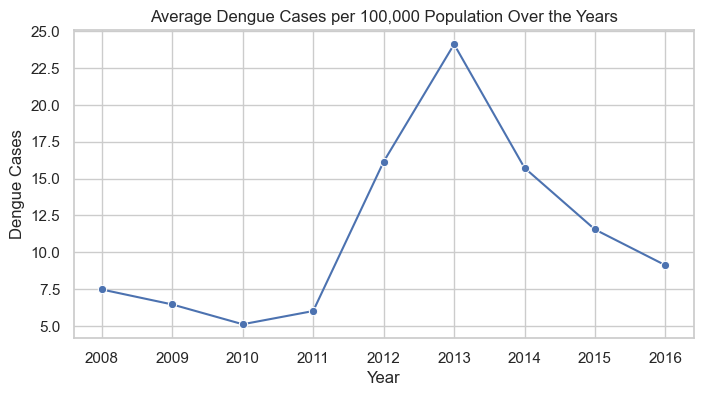

In [22]:
yearly = df.groupby("Year")["Dengue Cases"].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x="Year", y="Dengue Cases", data=yearly, marker="o")
plt.title("Average Dengue Cases per 100,000 Population Over the Years")
plt.show()

# Average Cases by Month

The bar plot shows the average dengue cases per 100,000 population across all months of the year. The peak occurs in March (around 16–17 cases per 100,000), followed closely by December, June and September. Which suggests that dengue incidence can rise both during the Wet season (June–November) and also in the Dry season (December-March).

High dengue cases consistently occur during the months of March, June, September, and December over the years. A noticeable trend can also be observed in which cases increase approximately every three months after a significant decline.

C:\Users\Chris\AppData\Local\Temp\ipykernel_11188\3595465302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="Dengue Cases", data=monthly, palette="viridis", order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


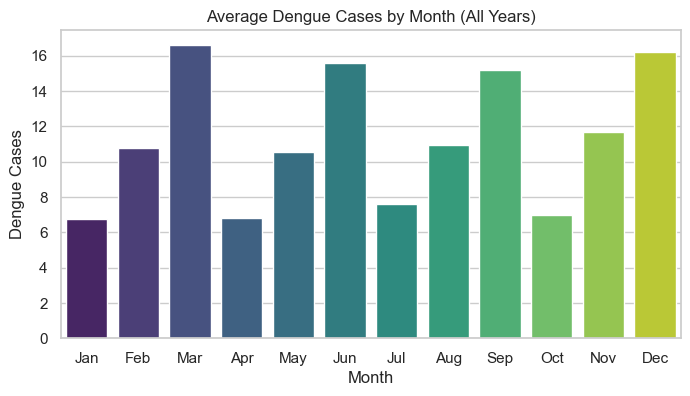

In [23]:
monthly = df.groupby("Month")["Dengue Cases"].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x="Month", y="Dengue Cases", data=monthly, palette="viridis", order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Dengue Cases by Month (All Years)")
plt.show()


# Regional Comparison

The regional comparison highlights significant variations in dengue incidence across different regions of the Philippines. Certain regions consistently report higher average cases per 100,000 population, marking them as dengue hotspots, while others maintain relatively lower incidence rates. \

CAR (Cordillera Administrative Region) shows the highest recorded incidence, particularly in 2012–2013, with values exceeding 60 cases per 100,000 population. Region VI (Western Visayas), Region I (Ilocos Region), and Region II (Cagayan Valley) also display relatively high case counts during the same peak years. By contrast, regions like ARMM, NCR, and Region XI show consistently lower incidence levels throughout the years.

The majority of regions experienced a sudden and significant increase in cases during 2012 and 2013, indicating an outbreak that began in 2012 and peaked in 2013. This was followed by a sharp decline in 2014, with some region's cases gradually decreasing until 2016.



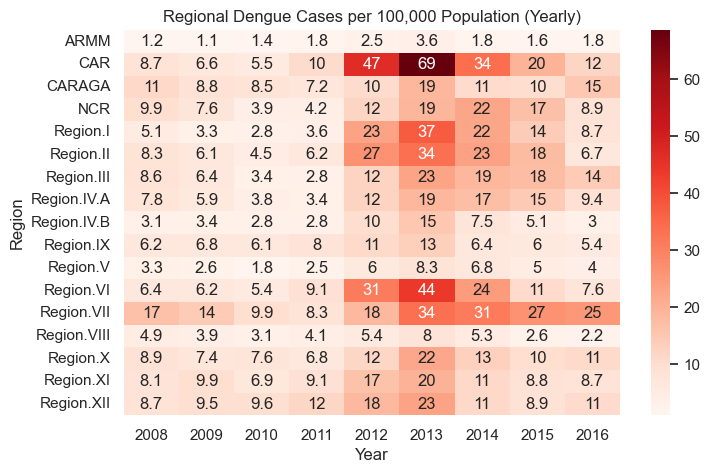

In [24]:
pivot = df.pivot_table(values="Dengue Cases", 
                       index="Region", columns="Year", aggfunc="mean")

plt.figure(figsize=(8,5))
sns.heatmap(pivot, cmap="Reds", annot=True)
plt.title("Regional Dengue Cases per 100,000 Population (Yearly)")
plt.show()